# Importing necessary libraries

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Load datasets

In [19]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [20]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# Checking for missing values

In [21]:
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


# Frequency distribution of outcome

In [22]:
train_outcome = pd.crosstab(index=train["Activity"],columns="count")      # Name the count column

print(train_outcome)

col_0               count
Activity                 
LAYING               1407
SITTING              1286
STANDING             1374
WALKING              1226
WALKING_DOWNSTAIRS    986
WALKING_UPSTAIRS     1073


# Visualising the outcome distribution

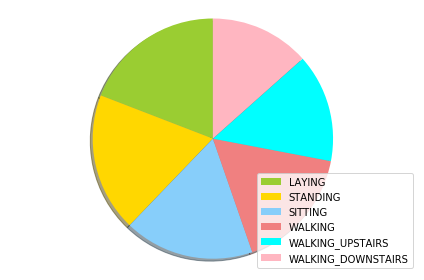

In [23]:
temp=train['Activity'].value_counts()  # returns counts of different categories of values
df=pd.DataFrame({'labels':temp.index , 'values':temp.values})

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


# Seperating Predictors and Outcome values

In [24]:
X_train=pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train=train.Activity.values.astype(object)

X_test=pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test=test.Activity.values.astype(object)

In [25]:
X_train.shape

(7352, 561)

In [26]:
X_test.shape

(2947, 561)

# Transforming non numerical labels into numerical labels

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(Y_train)


LabelEncoder()

In [29]:
Y_train=encoder.transform(Y_train)

In [31]:
encoder.fit(Y_test)
Y_test=encoder.transform(Y_test)

# Scaling the Train and Test feature set 

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning using grid search and cross validation

In [37]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [38]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

# Confusion Matrix and Accuracy Score

In [40]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

Best score for training data: 0.9385201305767138 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.0001 



In [44]:
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test)
#Y_pred = list(encoder.inverse_transform(Y_pred))

In [45]:
print(confusion_matrix(Y_test,Y_pred))

[[537   0   0   0   0   0]
 [  0 436  54   0   0   1]
 [  0  15 517   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   5 398  17]
 [  0   0   0  16   2 453]]


In [46]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.89      0.93       491
           2       0.91      0.97      0.94       532
           3       0.96      0.99      0.98       496
           4       0.99      0.95      0.97       420
           5       0.96      0.96      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [48]:
print("Training set score for SVM: %f" % final_model.score(X_train , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , Y_test ))

Training set score for SVM: 0.996872
Testing  set score for SVM: 0.961656
